<a href="https://colab.research.google.com/github/risvanisaputr/datasets/blob/master/PYIM_Assgn_3_PYIM009ONL009_RISVANI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import csv
import array
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.python.keras import models, layers, optimizers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
tfds.disable_progress_bar()

In [3]:
# Python program to convert .tsv file to .csv file
# importing pandas library
import pandas as pd

with open("amazon_reviews_us_Mobile_Electronics_v1_00.tsv") as file:
    tsv_file = csv.reader(file, delimiter="\t")
    for line in tsv_file:
        print(line)


['marketplace', 'customer_id', 'review_id', 'product_id', 'product_parent', 'product_title', 'product_category', 'star_rating', 'helpful_votes', 'total_votes', 'vine', 'verified_purchase', 'review_headline', 'review_body', 'review_date']
['US', '20422322', 'R8MEA6IGAHO0B', 'B00MC4CED8', '217304173', 'BlackVue DR600GW-PMP', 'Mobile_Electronics', '5', '0', '0', 'N', 'Y', 'Very Happy!', "As advertised. Everything works perfectly, I'm very happy with the camera. As a matter of fact I'm going to buy another one for my 2nd car.", '2015-08-31']
['US', '40835037', 'R31LOQ8JGLPRLK', 'B00OQMFG1Q', '137313254', 'GENSSI GSM / GPS Two Way Smart Phone Car Alarm System for iPhone Android Security', 'Mobile_Electronics', '5', '0', '1', 'N', 'Y', 'five star', "it's great", '2015-08-31']
['US', '51469641', 'R2Y0MM9YE6OP3P', 'B00QERR5CY', '82850235', 'iXCC Multi pack Lightning cable', 'Mobile_Electronics', '5', '0', '0', 'N', 'Y', 'great cables', 'These work great and fit my life proof case for the iPhon

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['US', '18814615', 'R35QU2KVF35MHK', 'B00FC43F0G', '398151874', "Phubby - the active wearWrist Cubby / Arm Wallet for cell Phone / iPod / PDA with 'touch' technology", 'Mobile_Electronics', '1', '0', '0', 'N', 'Y', 'not worth it.', "Not worth it. Can't really see my screen through the fabric. It's ok for using to carry a key Lord when exercising but that's not what I bought it for.", '2014-12-20']
['US', '52960291', 'R1V80A2R3OB4OK', 'B00JIPRKO2', '772479505', 'E-PRANCE® Latest Mini 0803 Ambarella A7LA50D Chip Full HD 1296P(Upgrade Mini 0801) Car DVR Recorder,With GPS Logger,No Internal Memory Model', 'Mobile_Electronics', '5', '1', '1', 'N', 'Y', 'The discrete size is a very good advantage as it is not noticed', 'has worked well so far. The discrete size is a very good advantage as it is not noticed', '2014-12-20']
['US', '9527508', 'R2AZBPAATBW83X', 'B00DP4CACE', '502757566', '01-12 FORD/MERCURY/MAZDA Escape/Mariner/Trubute With Keysless Entry. 4Dr', 'Mobile_Electronics', '5', '0', '

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['US', '38751128', 'R210NYR0XLM43M', 'B00HUBBE70', '260837959', 'ZTE Z998 Neoprene Sports Arm Band Pink', 'Mobile_Electronics', '5', '0', '0', 'N', 'Y', 'Phone fits great! If you use a case it will not ...', 'Phone fits great!  If you use a case it will not fit unfortunately but still a great buy:)', '2014-10-14']
['US', '29430746', 'RI0P149ZGTX2U', 'B007UXNHWS', '502332835', 'Cobble Pro Wireless Earbuds Bluetooth V4.1 Headphone w/ Mic & Charging Case', 'Mobile_Electronics', '3', '0', '0', 'N', 'Y', 'It was fine for my first Nook', 'It was fine for my first Nook, but does not fit the new model. I had to tape it to keep the Nook from falling out. Also the magnet for the tab came loose and slides around inside the cover.', '2014-10-14']
['US', '6406487', 'R23IZ4Y2BOA48C', 'B004LQY1L8', '12136226', 'Standard Horizon Explorer Ultra Compact Class D DSC - Black GX1600B', 'Mobile_Electronics', '5', '2', '2', 'N', 'Y', 'easy to use and easy to install', "As with all the Standard Horizon mercha

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
amazon, info = tfds.load('amazon_us_reviews/Mobile_Electronics_v1_00', with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/amazon_us_reviews/Mobile_Electronics_v1_00/0.1.0.incomplete9N828R/amazon_us_reviews-train.tfrecord


  0%|          | 0/104975 [00:00<?, ? examples/s]

Dataset amazon_us_reviews downloaded and prepared to /root/tensorflow_datasets/amazon_us_reviews/Mobile_Electronics_v1_00/0.1.0. Subsequent calls will reuse this data.


In [5]:
with open('/content/amazon_reviews_us_Mobile_Electronics_v1_00.tsv', 'rb') as f:
    data = f.readlines()

In [6]:
import re
tsv = open('amazon_reviews_us_Mobile_Electronics_v1_00.tsv', 'r')
fileContent =  tsv.read()
fileContent = re.sub("\t", ",", fileContent)
csv_file = open("amazon_reviews_us_Mobile_Electronics_v1_00.csv", "w")
csv_file.write(fileContent)
csv_file.close()

In [7]:
df = pd.read_csv('amazon_reviews_us_Mobile_Electronics_v1_00.csv', error_bad_lines=False)

b'Skipping line 7: expected 16 fields, saw 20\nSkipping line 8: expected 16 fields, saw 17\nSkipping line 10: expected 16 fields, saw 17\nSkipping line 11: expected 16 fields, saw 21\nSkipping line 12: expected 16 fields, saw 19\nSkipping line 13: expected 16 fields, saw 19\nSkipping line 15: expected 16 fields, saw 18\nSkipping line 16: expected 16 fields, saw 18\nSkipping line 18: expected 16 fields, saw 18\nSkipping line 20: expected 16 fields, saw 18\nSkipping line 25: expected 16 fields, saw 18\nSkipping line 27: expected 16 fields, saw 19\nSkipping line 28: expected 16 fields, saw 17\nSkipping line 29: expected 16 fields, saw 19\nSkipping line 30: expected 16 fields, saw 17\nSkipping line 33: expected 16 fields, saw 27\nSkipping line 35: expected 16 fields, saw 18\nSkipping line 36: expected 16 fields, saw 23\nSkipping line 40: expected 16 fields, saw 19\nSkipping line 44: expected 16 fields, saw 27\nSkipping line 46: expected 16 fields, saw 17\nSkipping line 48: expected 16 fiel

In [8]:
df.head(5)

marketplace  ... review_date
US     20422322  ...  2015-08-31
US     40835037  ...         NaN
US     51469641  ...         NaN
US      4332923  ...         NaN
US     44855305  ...  2015-08-31

[5 rows x 15 columns]

In [12]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

In [19]:
def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"

In [47]:
import tensorflow_datasets as tfds

# Fetch the dataset directly
mnist = tfds.image.MNIST()
# or by string name
mnist = tfds.builder('mnist')

# Describe the dataset with DatasetInfo
assert mnist.info.features['image'].shape == (28, 28, 1)
assert mnist.info.features['label'].num_classes == 10
assert mnist.info.splits['train'].num_examples == 60000

# Download the data, prepare it, and write it to disk
mnist.download_and_prepare()

# Load data from disk as tf.data.Datasets
datasets = mnist.as_dataset()
train_dataset, test_dataset = datasets['train'], datasets['test']
assert isinstance(train_dataset, tf.data.Dataset)

# And convert the Dataset to NumPy arrays if you'd like
for example in tfds.as_numpy(train_dataset):
  image, label = example['image'], example['label']

In [53]:
df.columns

Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date'],
      dtype='object')

In [54]:
tweet_df = df[['review_body','review_headline']]
print(tweet_df.shape)
tweet_df.head(5)

(39679, 2)


review_body                                    review_headline
US   I'm very happy with the camera. As a matter o...          As advertised. Everything works perfectly
US                                         2015-08-31                                         it's great
US                                         2015-08-31  These work great and fit my life proof case fo...
US                                         2015-08-31  Work very well but couldn't get used to not he...
US   I have bought several of these cameras and th...                     Be careful with these products

In [55]:
tweet_df["review_headline"].value_counts()

Five Stars                                                                                                                                                                                                                      609
One Star                                                                                                                                                                                                                        113
Good                                                                                                                                                                                                                            106
Four Stars                                                                                                                                                                                                                      105
good                                                                                    

In [56]:
sentiment_label = tweet_df.review_headline.factorize()
sentiment_label

(array([    0,     1,     2, ..., 35397, 35398,    -1]),
 Index(['As advertised. Everything works perfectly', 'it's great',
        'These work great and fit my life proof case for the iPhone 6',
        'Work very well but couldn't get used to not hearing anything out of the ear they v were plugged into.',
        'Be careful with these products', 'Worked great for vacation',
        'Love it',
        'Worked with MHD Flasher for Android.  Used to flash performance tunes to BMW 135i/335i N54 engines.',
        'I bought this unit as a replacement for my portable fish finder. Works great as did the original. I replaced it because the original was accidentally damaged.',
        'Met my application needs very well.',
        ...
        'i would buy this more than twice awesome subs great amp and a good deal all around a great system',
        'Product did not function as it should.  Seller was horrible doing business with.',
        'its been more than a month that i had ordered for t

In [57]:
tweet = tweet_df
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [58]:
print(tokenizer.word_index)

{'review': 1, 'body': 2, 'headline': 3}


In [59]:
print(padded_sequence[0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2]


In [60]:
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           128       
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 16,779
Trainable params: 16,779
Non-trainable params: 0
____________________________________________________

In [61]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 0.6963 - accuracy: 0.0000e+00 - val_loss: 0.6972 - val_accuracy: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 0s 224ms/step - loss: 0.6915 - accuracy: 1.0000 - val_loss: 0.7061 - val_accuracy: 0.0000e+00
Epoch 3/5
1/1 [==============================] - 0s 222ms/step - loss: 0.6909 - accuracy: 1.0000 - val_loss: 0.7151 - val_accuracy: 0.0000e+00
Epoch 4/5
1/1 [==============================] - 0s 225ms/step - loss: 0.6745 - accuracy: 1.0000 - val_loss: 0.7242 - val_accuracy: 0.0000e+00
Epoch 5/5
1/1 [==============================] - 0s 219ms/step - loss: 0.6728 - accuracy: 1.0000 - val_loss: 0.7337 - val_accuracy: 0.0000e+00


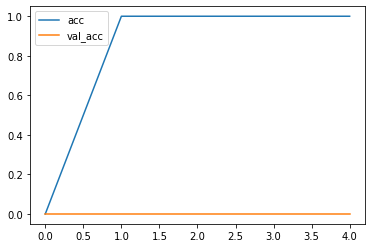

<Figure size 432x288 with 0 Axes>

In [62]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

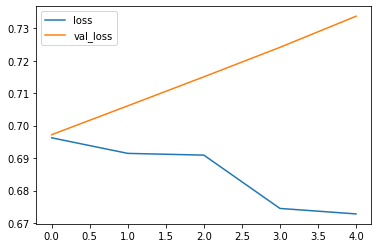

<Figure size 432x288 with 0 Axes>

In [63]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plot.jpg")

In [64]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])

In [65]:
test_sentence1 = "What a great watch. Both watches and strap "
predict_sentiment(test_sentence1)

test_sentence2 = "love watching all the episodes of Dexter"
predict_sentiment(test_sentence2)

Predicted label:  As advertised. Everything works perfectly
Predicted label:  As advertised. Everything works perfectly
